# <center>Projet Deep Learning - Exercice de classification</center>

In [508]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import random
import glob

from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential, Model
from keras.layers.core import Dense, Flatten
from tensorflow.keras.layers import InputLayer
from matplotlib import pyplot as plt
from random import randint
import matplotlib.image as mpimg
%matplotlib inline

On va afficher 5 images random présentes dans le fichier.

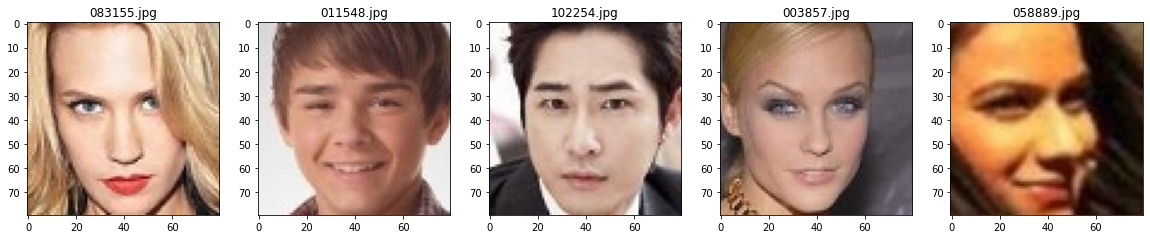

In [509]:
plt.figure(figsize=(20,20))
img_folder = os.path.join(r'C:\Users\Armel\Desktop\Cours_ESIEA\Deep_Learning\nov2021_train')
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path = os.path.join(img_folder, file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

##### Création des données d'image et des étiquettes à partir des images du dossier

- Le dossier source est le paramètre d'entrée contenant les images des différentes classes.

- Lire le fichier image du dossier et le convertir au bon format de couleur.

- Redimensionnez l'image en fonction de la dimension d'entrée requise pour le modèle.

- Convertir l'image en un tableau Numpy avec float32 comme type de données.

- Normaliser le tableau d'images pour avoir des valeurs réduites entre 0 et 1 de 0 à 255 pour une distribution de données similaire, ce qui permet une convergence plus rapide.

In [510]:
list_image = os.listdir(img_folder)
len(list_image)

119294

In [511]:
file = open(r'C:\Users\Armel\Desktop\Cours_ESIEA\Deep_Learning\label_nov2021_train.txt')
# utilisez readline() pour lire la première ligne
line = file.readline()
i = 0
while line:
    i = i + 1
    # utilisez readline() pour lire la ligne suivante
    line = file.readline()
file.close()
print(i)

119294


In [512]:
# Modification de la dimension des images 
img_size = 200

def create_dataset_train(img_folder, nb):
   
    img_data_array=[]
    class_name=[]
    label_file = open(r'C:\Users\Armel\Desktop\Cours_ESIEA\Deep_Learning\label_nov2021_train.txt')
    label_file = label_file.readlines()
    imageList = os.listdir(img_folder)
    
    for i in range(nb):
        image = imageList[i]
        image_path= os.path.join(img_folder, image)
        image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (img_size, img_size),interpolation = cv2.INTER_AREA)
        image=np.array(image)
        image = image.astype('float64')
        image /= 255.0 
        img_data_array.append(image)
        class_name.append(label_file[i].replace("\n",""))
    file.close()
    return img_data_array, class_name
    
img_data, class_name = create_dataset_train(img_folder, 10000)

In [513]:
target_dict = {k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'0': 0, '1': 1}

In [514]:
target_val = [target_dict[class_name[i]] for i in range(len(class_name))]

#### Création du réseau convolutif de base

In [515]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (img_size, img_size, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [516]:
history = model.fit(x=np.array(img_data, np.float32), 
                    y=np.array(list(map(int,target_val)),np.float32), 
                    epochs=15,
                    batch_size=250,
                    validation_split = 0.2)

Epoch 1/15
32/32 [==============================] - 147s 4s/step - loss: 1.0743 - accuracy: 0.6342 - val_loss: 0.5690 - val_accuracy: 0.7585
Epoch 2/15
32/32 [==============================] - 130s 4s/step - loss: 0.5632 - accuracy: 0.7389 - val_loss: 0.5421 - val_accuracy: 0.7580
Epoch 3/15
32/32 [==============================] - 137s 4s/step - loss: 0.5402 - accuracy: 0.7390 - val_loss: 0.5002 - val_accuracy: 0.7585
Epoch 4/15
32/32 [==============================] - 228s 7s/step - loss: 0.5052 - accuracy: 0.7400 - val_loss: 0.4724 - val_accuracy: 0.7625
Epoch 5/15
29/32 [==========================>...] - ETA: 20s - loss: 0.4830 - accuracy: 0.7499

KeyboardInterrupt: 

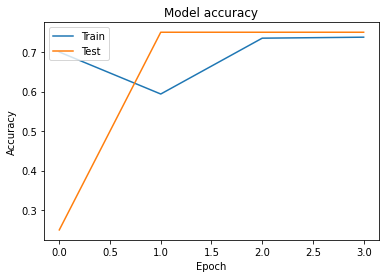

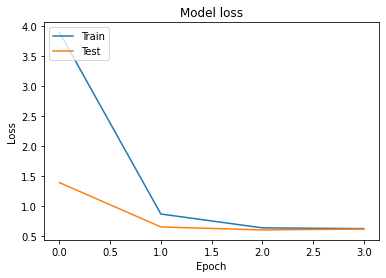

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
img_folder_val = os.path.join(r'C:\Users\Armel\Desktop\Cours_ESIEA\Deep_Learning\nov2021_val')
def create_dataset_val(img_folder_val, nb):
   
    img_data_array=[]
    imageList = os.listdir(img_folder_val)
    
    for i in range(nb):
        image = imageList[i]
        image_path= os.path.join(img_folder_val, image)
        image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (img_size, img_size),interpolation = cv2.INTER_AREA)
        image=np.array(image)
        image = image.astype('float64')
        image /= 255.0 
        img_data_array.append(image)
    file.close()
    return img_data_array
    #return pd.DataFrame({'Image num': img_data_array,'label': class_name})
# extract the image array and class name
#df = create_dataset(img_folder, 100)
test_images = create_dataset_val(img_folder_val, 100)

In [ ]:
predictions = model.predict(np.array(test_images))
predictions

array([[0.4267671 , 0.5732328 ],
       [0.43294618, 0.56705385],
       [0.42679295, 0.5732071 ],
       [0.42325598, 0.576744  ],
       [0.40167278, 0.5983272 ],
       [0.4265901 , 0.57340986],
       [0.4304404 , 0.56955963],
       [0.42363667, 0.5763634 ],
       [0.39800113, 0.60199887],
       [0.44152722, 0.55847275],
       [0.3941355 , 0.60586447],
       [0.39811704, 0.601883  ],
       [0.4238003 , 0.57619977],
       [0.4464232 , 0.55357677],
       [0.42476183, 0.5752382 ],
       [0.4140811 , 0.5859189 ],
       [0.41627073, 0.58372927],
       [0.40121537, 0.5987847 ],
       [0.39100322, 0.6089968 ],
       [0.43081447, 0.56918555],
       [0.4321141 , 0.5678859 ],
       [0.40073043, 0.59926957],
       [0.4367402 , 0.5632598 ],
       [0.43061918, 0.5693808 ],
       [0.3986484 , 0.60135156],
       [0.40157914, 0.59842086],
       [0.44755858, 0.5524415 ],
       [0.48548794, 0.514512  ],
       [0.4223152 , 0.57768476],
       [0.41015267, 0.5898474 ],
       [0.

In [ ]:
classes = np.argmax(predictions, axis = 1)
print(classes)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
